# Loan approval prediction
Loan approval prediction involves the analysis of various factors, such as the applicant’s financial history, income, credit rating, employment status, and other relevant attributes. By leveraging historical loan data and applying machine learning algorithms, businesses can build models to determine loan approvals for new applicants.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('loan_prediction.csv')
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [ ]:
df = df.drop('Loan_ID', axis=1)

In [ ]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The data has missing values in some of the categorical columns and some numerical columns. Let’s have a look at the descriptive statistics of the dataset before filling in the missing values:

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# Fill missing values in categorical columns with mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [ ]:
# Fill missing values in LoanAmount with the median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

# Fill missing values in Loan_Amount_Term with the mode
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

# Fill missing values in Credit_History with the mode
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


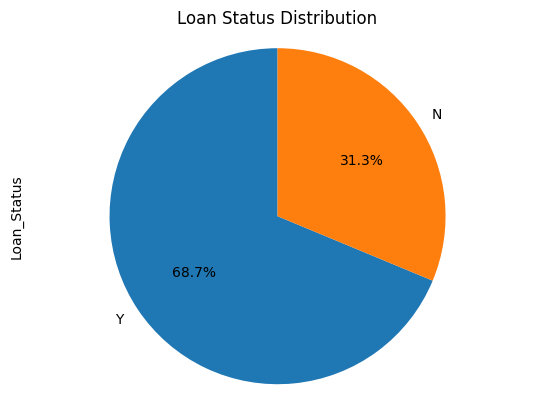

In [ ]:
loan_status_counts = df['Loan_Status'].value_counts()
loan_status_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Loan Status Distribution')
plt.show()

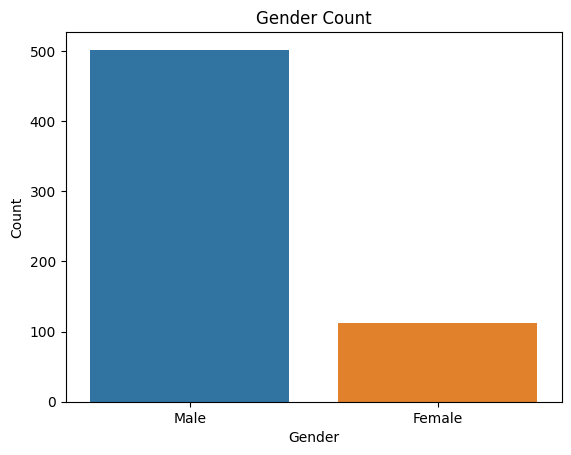

In [ ]:
import seaborn as sns
gender_counts = df['Gender'].value_counts()
sns.countplot(x='Gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Count')
plt.show()


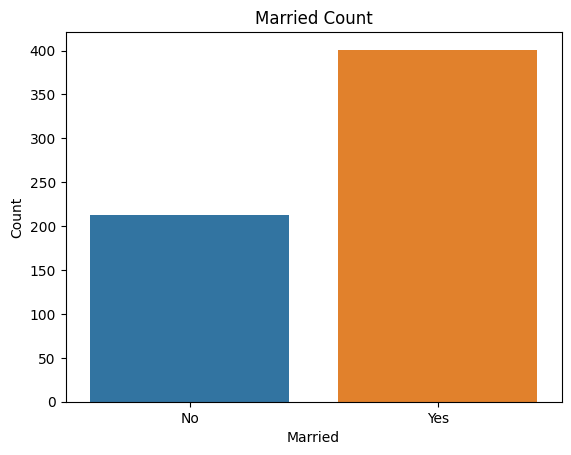

In [ ]:
married_counts = df['Married'].value_counts()
sns.countplot(x='Married', data=df)
plt.xlabel('Married')
plt.ylabel('Count')
plt.title('Married Count')
plt.show()


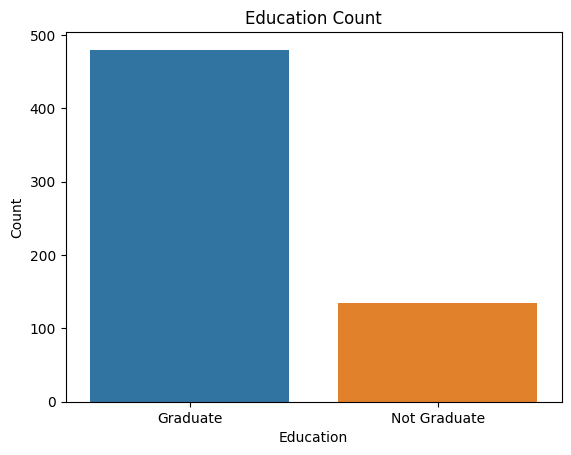

In [ ]:
married_counts = df['Education'].value_counts()
sns.countplot(x='Education', data=df)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Count')
plt.show()


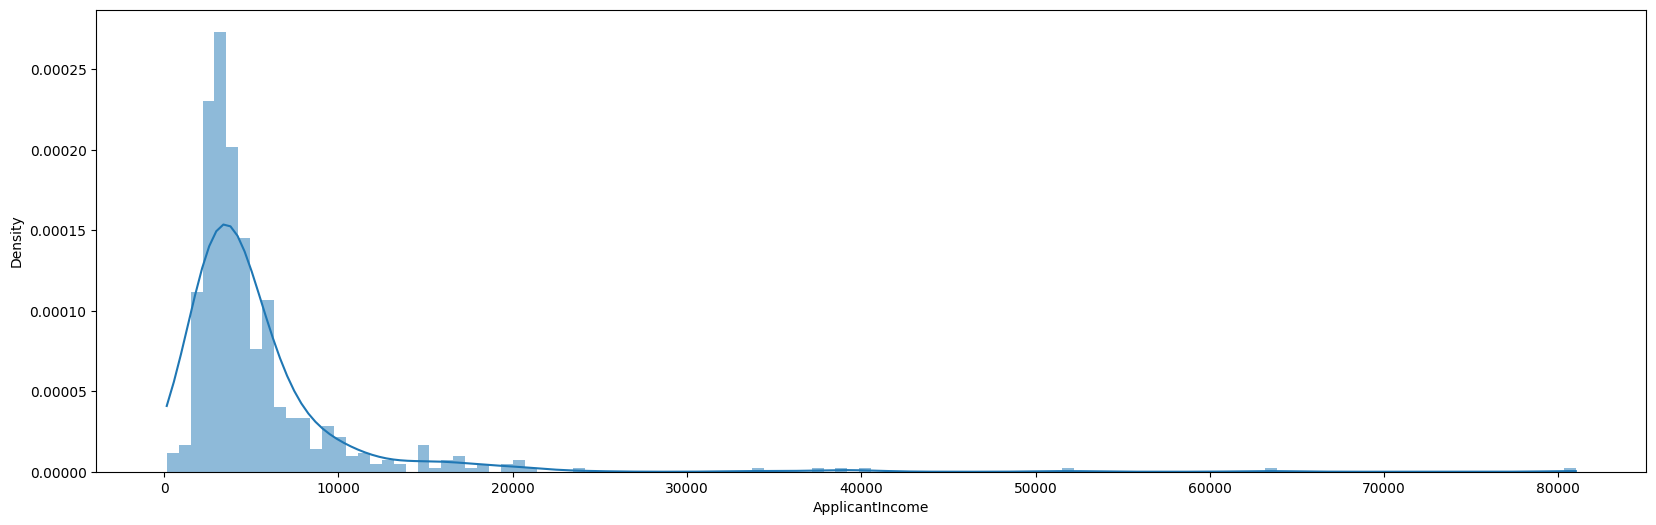

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.histplot(df['ApplicantIncome'],kde=True, stat="density", linewidth=0)
plt.show()

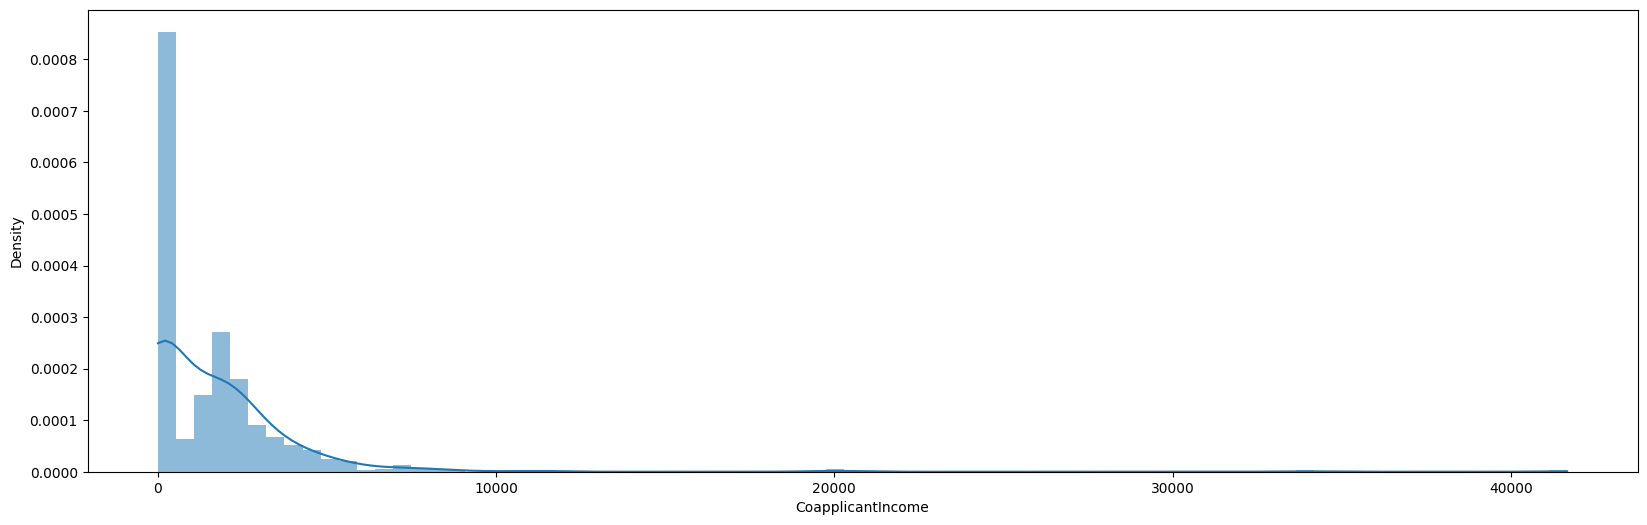

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.histplot(df['CoapplicantIncome'],kde=True, stat="density", linewidth=0)
plt.show()

<Axes: >

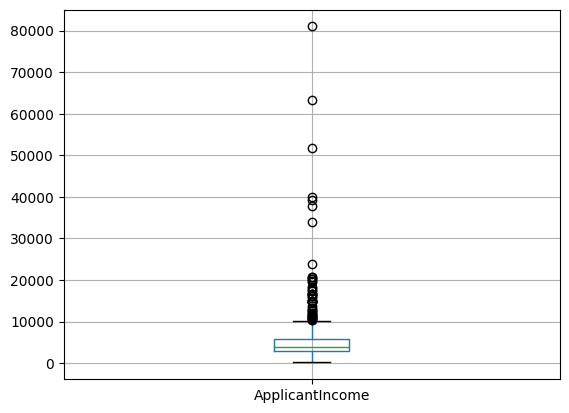

In [ ]:
df.boxplot(column='ApplicantIncome',widths=0.15)

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

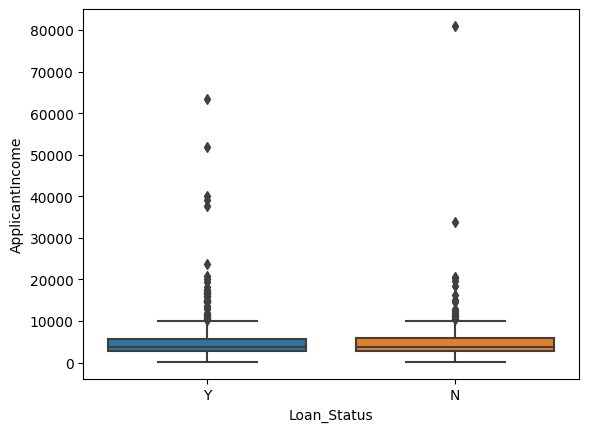

In [ ]:
sns.boxplot(y='ApplicantIncome',x='Loan_Status', data=df)

<Axes: xlabel='Education', ylabel='ApplicantIncome'>

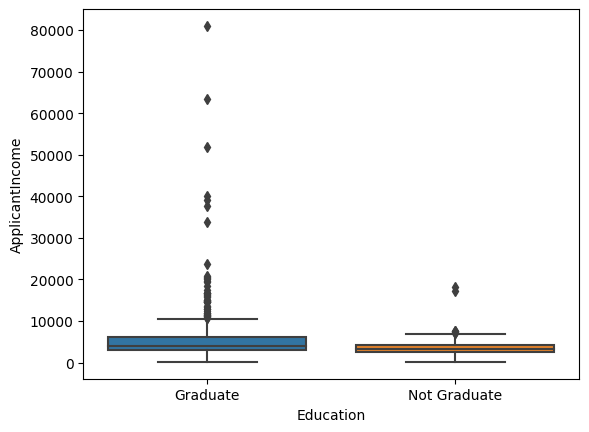

In [ ]:
sns.boxplot(y='ApplicantIncome',x='Education', data=df)

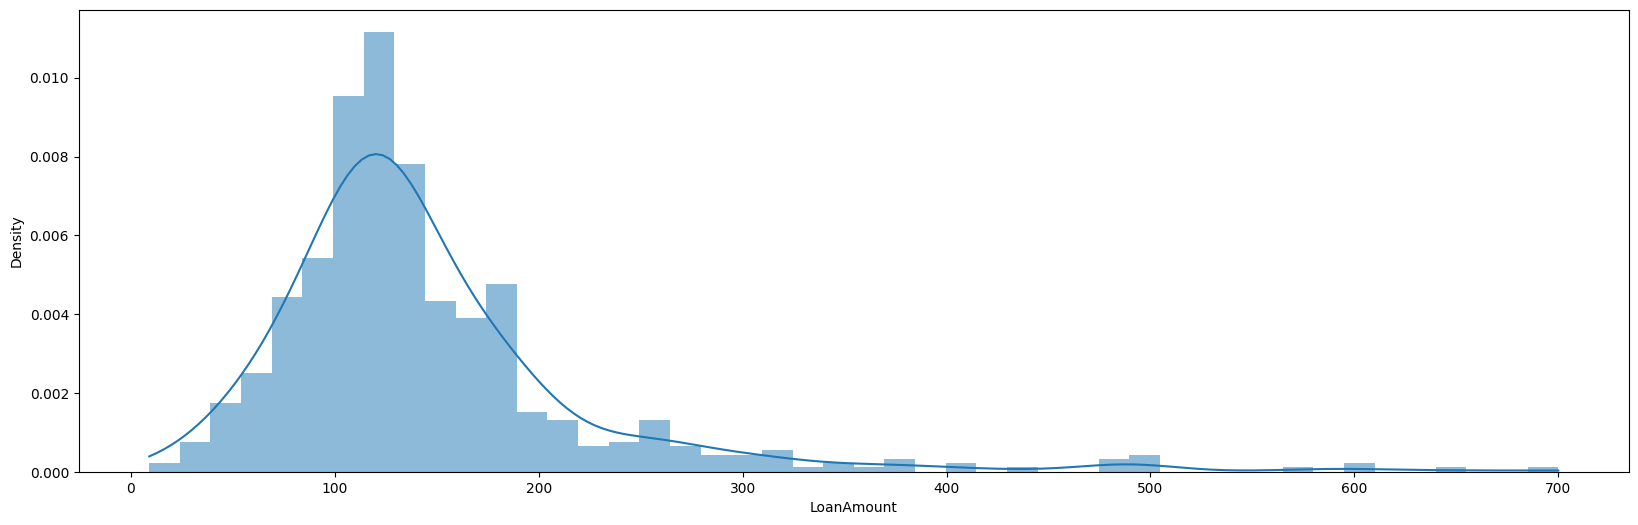

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.histplot(df['LoanAmount'],kde=True, stat="density", linewidth=0)
plt.show()


<Axes: ylabel='LoanAmount'>

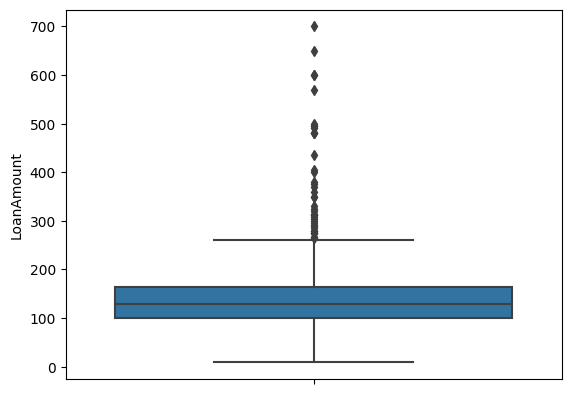

In [ ]:
sns.boxplot(y='LoanAmount', data=df)

In [ ]:
# Calculate the IQR
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['ApplicantIncome'] >= lower_bound) & (df['ApplicantIncome'] <= upper_bound)]

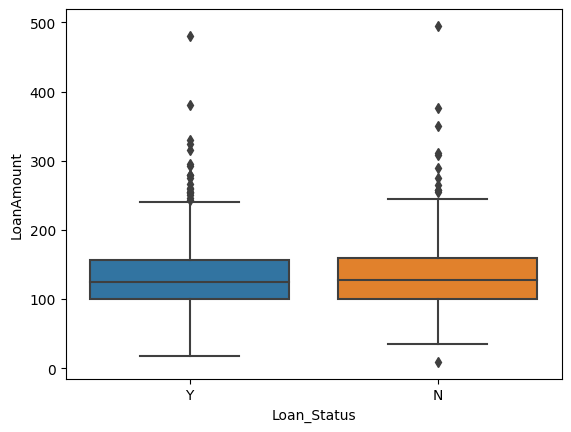

In [ ]:
fig_loan_amount = sns.boxplot(y='LoanAmount',x='Loan_Status', data=df)


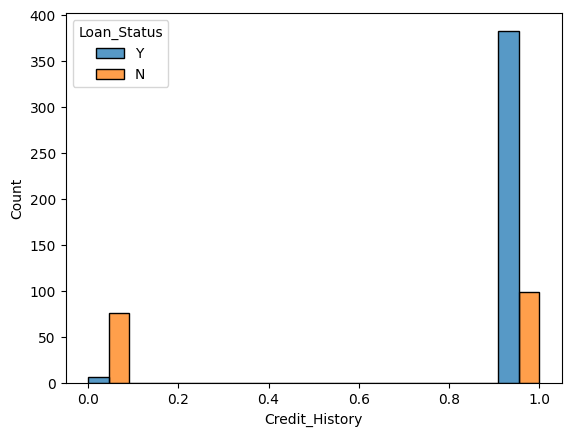

In [ ]:
fig_credit_history = sns.histplot(data=df,x='Credit_History',hue='Loan_Status',multiple="dodge")


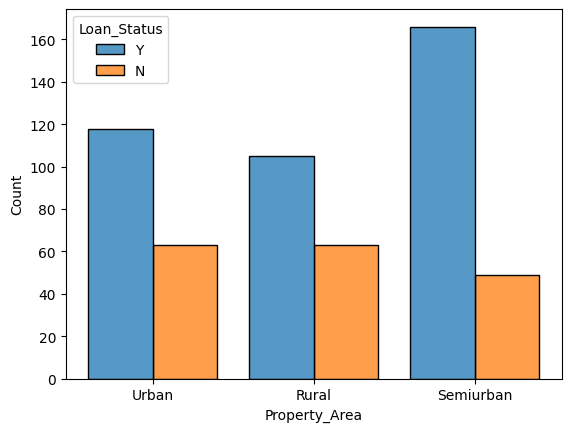

In [ ]:
fig_property_area =sns.histplot(data=df,x='Property_Area',hue='Loan_Status',multiple="dodge",shrink=0.8)


# Data Preparation and Training Loan Approval Prediction Model

In this step, we will:



1.   convert categorical columns into numerical ones;
2.   split the data into training and test sets;
3.   scale the numerical features;
4.   train the loan approval prediction model.






In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# Convert categorical columns to numerical using one-hot encoding
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

df = pd.get_dummies(df, columns=cat_cols)

# Split the dataset into features (X) and target (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical columns using StandardScaler
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

from sklearn.svm import SVC
model=SVC(random_state=42)
model.fit(X_train,y_train)


SVC(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

['Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y']


In [ ]:
# Convert X_test to a DataFrame
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

# Add the predicted values to X_test_df
X_test_df['Loan_Status_Predicted'] = y_pred
print(X_test_df.head())

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
585         0.045014           0.374594    0.619997         -3.856561   
569        -0.531280           0.085836   -0.541877          0.279941   
255        -0.574102          -0.550912    2.038168          0.279941   
570        -0.401782          -0.011034    0.859207          0.279941   
529         1.334840          -0.550912   -0.097631          0.279941   

     Credit_History  Gender_Female  Gender_Male  Married_No  Married_Yes  \
585        0.439456              0            1           0            1   
569       -2.275540              0            1           0            1   
255        0.439456              1            0           1            0   
570        0.439456              0            1           0            1   
529        0.439456              0            1           1            0   

     Dependents_0  ...  Dependents_2  Dependents_3+  Education_Graduate  \
585             0  ...       